In [ ]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
raw_data = pd.read_csv('/content/1.04. Real-life example.csv')
raw_data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [ ]:

raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
# drop the model column as it is not important
df = raw_data.drop('Model', axis=1)

In [ ]:
# check for null values
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
# drop missing values
df = df.dropna()
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
# explore the probability distribution of the numerical values using seaborn. 
# define two function that creates the histplot
def histplot(data, title):
  """ This function accepts specific dataframe column and creates distplots"""
  plt.figure(figsize=(16,12))
  for i in range(len(data)):
    plt.subplot(2,2, i+1).set_title(title[i])
    sns.histplot(data=data[i], kde=True)
  
  return plt.show() 

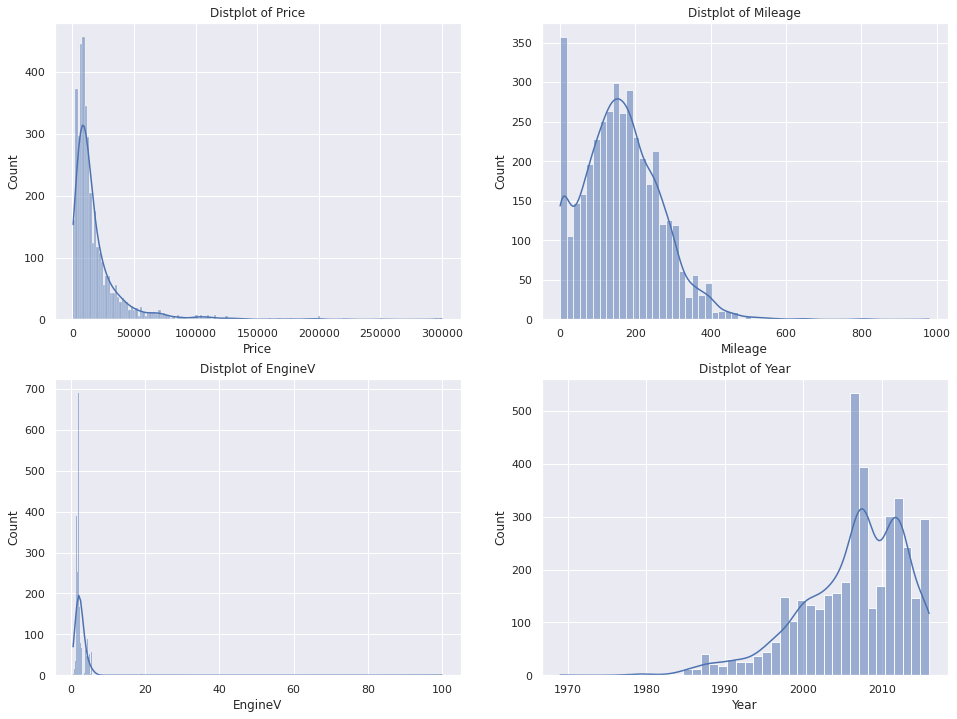

In [ ]:
data = [df['Price'], df['Mileage'], df['EngineV'], df['Year']]
title = ['Distplot of Price', 'Distplot of Mileage', 'Distplot of EngineV', 'Distplot of Year']
histplot(data, title)     

In [ ]:
# with the distplot above, we can see the skewness of the data which dictates the presence of outliers
# define a function that returns the index of outliers
def outliers(df, col):
  """The function calculates the lower and upper bounds of the data columns and returns the index of the outliers """
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
    
  lst = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return lst

In [ ]:
index_list = []
for columns in ['Price', 'Mileage', 'Year']:
  index_list.extend(outliers(df, columns))

In [ ]:
index_list

[5,
 37,
 41,
 62,
 64,
 67,
 104,
 109,
 111,
 119,
 131,
 145,
 158,
 173,
 177,
 190,
 218,
 234,
 279,
 285,
 289,
 339,
 348,
 362,
 395,
 410,
 438,
 445,
 451,
 480,
 482,
 545,
 559,
 574,
 594,
 602,
 612,
 613,
 632,
 639,
 648,
 651,
 666,
 670,
 680,
 688,
 730,
 731,
 734,
 748,
 803,
 805,
 811,
 840,
 847,
 894,
 926,
 955,
 963,
 967,
 978,
 993,
 997,
 998,
 999,
 1019,
 1030,
 1033,
 1037,
 1044,
 1063,
 1090,
 1091,
 1110,
 1112,
 1146,
 1150,
 1160,
 1161,
 1172,
 1199,
 1217,
 1226,
 1244,
 1283,
 1294,
 1304,
 1346,
 1360,
 1365,
 1408,
 1428,
 1432,
 1436,
 1453,
 1459,
 1492,
 1508,
 1533,
 1534,
 1553,
 1557,
 1560,
 1590,
 1594,
 1604,
 1609,
 1625,
 1644,
 1654,
 1658,
 1674,
 1676,
 1728,
 1736,
 1738,
 1745,
 1752,
 1779,
 1796,
 1830,
 1835,
 1850,
 1857,
 1864,
 1875,
 1885,
 1891,
 1912,
 1914,
 1929,
 1934,
 1967,
 1993,
 2000,
 2008,
 2011,
 2016,
 2034,
 2044,
 2056,
 2059,
 2128,
 2130,
 2134,
 2137,
 2138,
 2151,
 2159,
 2188,
 2209,
 2212,
 2220,
 

In [ ]:
# define a function that removes the outliers 
def remove(df, lst):
  """This function removes the outliers from the dateset"""
  lst = sorted(set(lst))
  df = df.drop(lst)
  return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:

df_cleaned = df_cleaned[df_cleaned['EngineV'] < 6.5]
df_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3519,3519.000000,3519,3519.000000,3519.000000,3519,3519,3519.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,811,NaN,1374,NaN,NaN,1580,3158,NaN
mean,NaN,13718.135141,NaN,170.794828,2.379935,NaN,NaN,2006.263143
std,NaN,9550.576253,NaN,90.610183,0.904150,NaN,NaN,5.664696
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,7000.000000,NaN,107.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,10900.000000,NaN,165.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,18100.000000,NaN,231.000000,2.800000,NaN,NaN,2011.000000


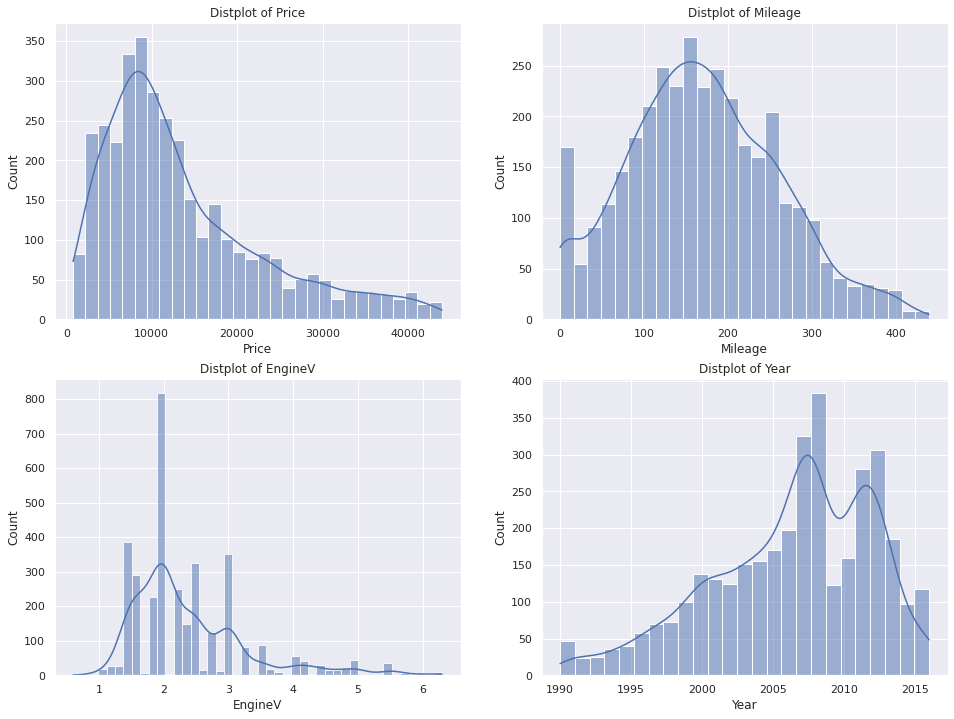

In [ ]:
# use the defined histplot function to check the absence of outliers
data = [df_cleaned['Price'], df_cleaned['Mileage'], df_cleaned['EngineV'], df_cleaned['Year']]
title = ['Distplot of Price', 'Distplot of Mileage', 'Distplot of EngineV', 'Distplot of Year']
histplot(data, title)  

In [ ]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [ ]:
# create scatter plots of which shows whether the data is linear or not.
def scatterplot(x_data, y_data, title, xlabel, ylabel):
  """This function creates a subplot of scatterplots of data on the y-axis againtst x-axis and the x and y axis are also labelled """
  plt.figure(figsize=(12,20))
  for i in range(len(x_data)):
    plt.subplot(3,1, i+1).set_title(title[i])
    plt.scatter(x_data[i], y_data)
    plt.xlabel(xlabel[i])
    plt.ylabel(ylabel)
  return plt.show()

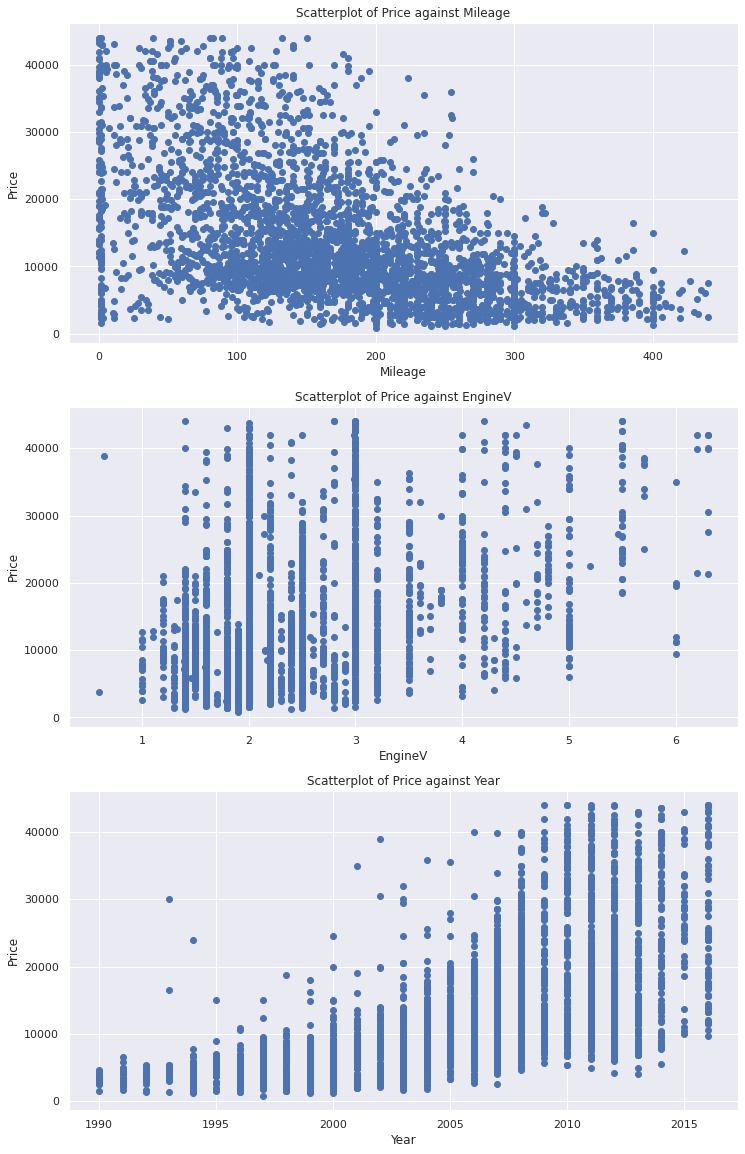

In [ ]:
x_data = [df_cleaned['Mileage'], df_cleaned['EngineV'], df_cleaned['Year']]
y_data = [df_cleaned['Price']]
xlabel = ['Mileage', 'EngineV', 'Year']
ylabel = 'Price'
title = ['Scatterplot of Price against Mileage', 'Scatterplot of Price against EngineV', 'Scatterplot of Price against Year']

scatterplot(x_data, y_data, title, xlabel, ylabel)

In [ ]:
# from the above scatterplots, a linear regression is not fit for this model, the plots follow an exponential pattern
# it is best to use log transformation to transform the Price column since its does not follow a normal distribution compared to the other Mileage, EngineV, and Year

log_price = np.log(df_cleaned['Price'])
df_cleaned['log_price'] = log_price
df_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


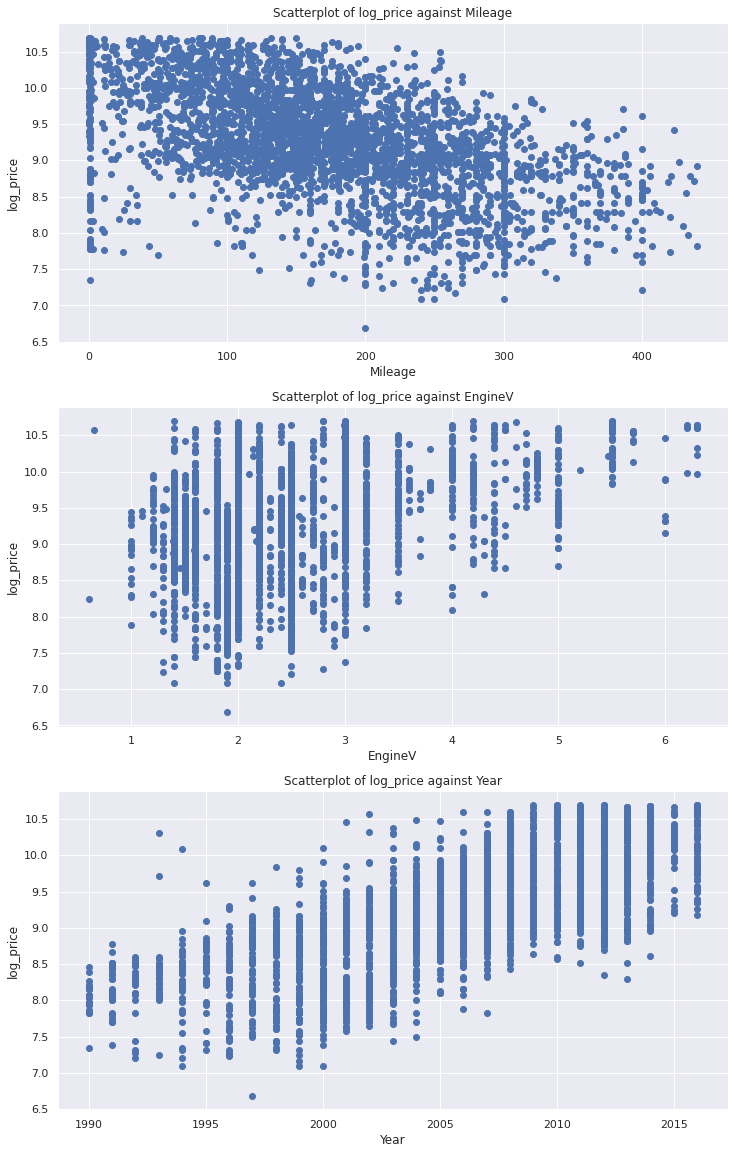

In [ ]:
# plot the scatter plots against to see if there will be a linear pattern
x_data = [df_cleaned['Mileage'], df_cleaned['EngineV'], df_cleaned['Year']]
y_data = [df_cleaned['log_price']]
xlabel = ['Mileage', 'EngineV', 'Year']
ylabel = 'log_price'
title = ['Scatterplot of log_price against Mileage', 'Scatterplot of log_price against EngineV', 'Scatterplot of log_price against Year']

scatterplot(x_data, y_data, title, xlabel, ylabel)

In [ ]:
 # from the above plots, a linear regression is now fit for the model
 # we have to drop the price column since we no longer need it
data_cleaned = df_cleaned.drop('Price', axis=1)
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
# we have to check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,4.582567,Mileage
1,8.023747,EngineV
2,10.416000,Year


In [ ]:
# we drop the year column since its VIF value is above 10.
#data = data_cleaned.drop('Year', axis=1)

In [ ]:
# create dummy variables for the categorical variables
data_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
# the data is ready for the regression model
# dictate the inputs and targets
targets = data_dummies['log_price']
inputs = data_dummies.drop('log_price', axis=1)

In [ ]:
# split the data into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [ ]:
# scale the data using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train.iloc[:, :2] = scaler.fit_transform(x_train.iloc[:, :2])
x_test.iloc[:, :2] = scaler.transform(x_test.iloc[:, :2])

In [ ]:
# create the regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# fit the model into the x_train to get the predictions
y_hat = reg.predict(x_train)

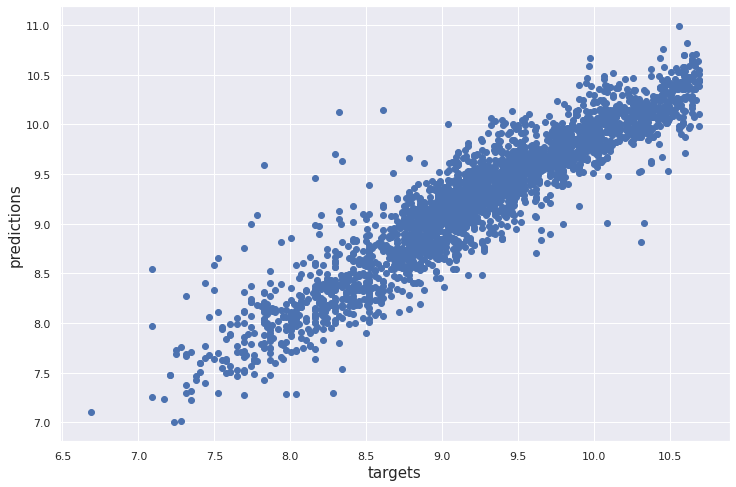

In [ ]:
# create a scatter plot of y_train(targets) and y_hat(prediction)
plt.figure(figsize=(12,8))
plt.scatter(y_train, y_hat)
plt.xlabel('targets', fontsize=15)
plt.ylabel('predictions', fontsize=15)
plt.show()

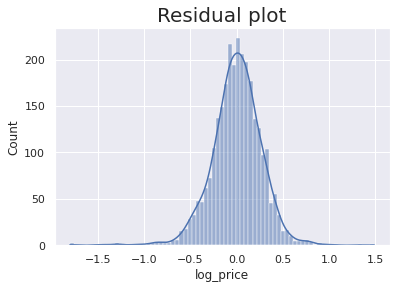

In [ ]:
# create a plot of the residuals
sns.histplot(y_train - y_hat, kde=True)
plt.title('Residual plot', fontsize=20)
plt.show()

In [ ]:
# check the linear regression score of the training data
reg.score(x_train, y_train)

0.8639185529114228

In [ ]:
# check for the bias of the training data
reg.intercept_

-153.12183643952443

In [ ]:
reg_summary_table = pd.DataFrame(inputs.columns.values, columns=['features'])
reg_summary_table['Weights'] = reg.coef_
reg_summary_table

,features,Weights
0,Mileage,-0.050506
1,EngineV,0.182558
2,Year,0.080806
3,Brand_BMW,0.042798
4,Brand_Mercedes-Benz,-0.051340
5,Brand_Mitsubishi,-0.453565
6,Brand_Renault,-0.606771
7,Brand_Toyota,-0.179225
8,Brand_Volkswagen,-0.240030
9,Body_hatch,-0.371423


In [ ]:
# test the model
y_hat_test = reg.predict(x_test)

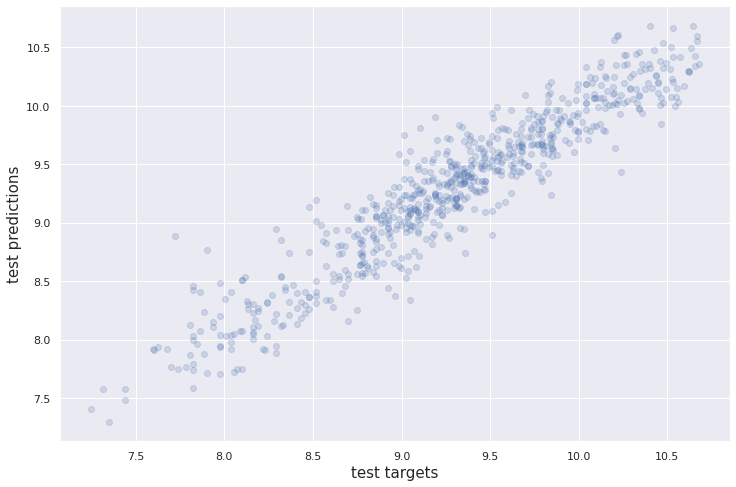

In [ ]:
# create a scatter plot of y_test(targets) and y_hat_test(prediction)
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('test targets', fontsize=15)
plt.ylabel('test predictions', fontsize=15)
plt.show()

In [ ]:
# take a look at some of the predictions
df_predict = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_predict.head()

,Prediction
0,10010.464974
1,6589.166114
2,1954.958705
3,7015.454675
4,25395.307171


In [ ]:
# merge the y_test with the y_hat_test
df_predict['Targets'] = np.exp(y_test)
df_predict.head()

,Prediction,Targets
0,10010.464974,NaN
1,6589.166114,NaN
2,1954.958705,NaN
3,7015.454675,23000.0
4,25395.307171,18300.0


In [ ]:
# reset the y_test index so that it will collate with the prediction index
y_test = y_test.reset_index(drop=True)
df_predict['Targets'] = np.exp(y_test)
df_predict.head()

,Prediction,Targets
0,10010.464974,8500.0
1,6589.166114,7200.0
2,1954.958705,1699.0
3,7015.454675,4100.0
4,25395.307171,29500.0


In [ ]:
# create a column called residual which takes the difference between targets and predictions
df_predict['Residual'] = df_predict['Targets'] - df_predict['Prediction']
# Also, create a column which takes the percentage difference of the residual values and the targets
df_predict['%Difference'] = np.absolute((df_predict['Residual'] / df_predict['Targets'])*100)
df_predict

,Prediction,Targets,Residual,%Difference
0,10010.464974,8500.0,-1510.464974,17.770176
1,6589.166114,7200.0,610.833886,8.483804
2,1954.958705,1699.0,-255.958705,15.065256
3,7015.454675,4100.0,-2915.454675,71.108651
4,25395.307171,29500.0,4104.692829,13.914213
...,...,...,...,...
699,38763.907848,26900.0,-11863.907848,44.103747
700,3892.740272,3600.0,-292.740272,8.131674
701,3118.786333,3500.0,381.213667,10.891819
702,14542.064450,8000.0,-6542.064450,81.775806


In [ ]:
df_predict.describe()

,Prediction,Targets,Residual,%Difference
count,704.000000,704.000000,704.000000,704.000000
mean,13204.212524,13593.839006,389.626482,18.778716
std,8216.501480,9238.105854,3675.240715,18.585016
min,1477.833561,1400.000000,-12972.348885,0.005657
25%,7285.102901,7000.000000,-1403.761131,6.827788
50%,11518.675657,10999.000000,82.216826,14.645925
75%,17331.358634,17900.000000,1574.968527,25.261232
max,43525.554268,43500.000000,16111.199821,220.689636


In [ ]:
# sort the table by the % percentage difference
df_predict.sort_values('%Difference')

,Prediction,Targets,Residual,%Difference
358,16799.049561,16800.00,0.950439,0.005657
10,19808.747138,19800.00,-8.747138,0.044177
405,12005.240716,11999.00,-6.240716,0.052010
480,8908.530917,8900.00,-8.530917,0.095853
85,8918.385757,8900.00,-18.385757,0.206582
...,...,...,...,...
154,18143.177297,9003.15,-9140.027297,101.520327
436,20006.208733,9800.00,-10206.208733,104.144987
596,17163.437139,8200.00,-8963.437139,109.310209
703,6391.275580,2700.00,-3691.275580,136.713910
